In [1]:
%matplotlib nbagg
import os
import gzip
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import desc.sim_utils

In [2]:
ddf = desc.sim_utils.Run20Region(ra_mid=53.125, ne_corner=(53.764, -27.533),
                                 dec_range=(-28.667, -27.533))

In [3]:
def plot_objects(instcat_file, color='blue', label=None, alpha=0.5, size=2):
    if instcat_file.endswith('gz'):
        my_open = gzip.open
    else:
        my_open = open
    ra, dec = [], []
    with my_open(instcat_file) as fd:
        for line in fd:
            tokens = line.strip().split()
            ra.append(float(tokens[2]))
            dec.append(float(tokens[3]))
    plt.scatter(ra, dec, s=size, color=color, label=label, alpha=alpha)

In [4]:
def plot_instcat(visit, ddf, figsize=(8, 8)):
    plt.figure(figsize=figsize)
    base_dir = '/global/u1/j/jchiang8/dev/SLSprinkler/scripts/dc2'
    plot_objects(os.path.join(base_dir, 'test_outputs', f'{visit:08d}/lensed_hosts_{visit}.txt'),
                 size=50, alpha=0.1, label='lensed hosts', color='black')
    plot_objects(os.path.join(base_dir, 'test_outputs',
                 f'{visit:08d}/agn_gal_cat_{visit}.txt.gz'), label='AGN', color='green')
    plot_objects(os.path.join(base_dir, 'test_outputs',
                 f'{visit:08d}/lensed_agn_{visit}.txt'), label='GLAGN', color='blue')
    plot_objects(os.path.join(base_dir, 'test_outputs',
                 f'{visit:08d}/lensed_sne_{visit}.txt'), label='GLSNE', color='red')
    ddf.plot_boundary(color='yellow')
    plt.legend(fontsize='x-small')
    plt.xlabel('RA (deg)')
    plt.ylabel('Dec (deg)')
    plt.title(f'v{visit}')
    plt.savefig(f'Run3.0i_instcat_objects_v{visit}.png')

<IPython.core.display.Javascript object>


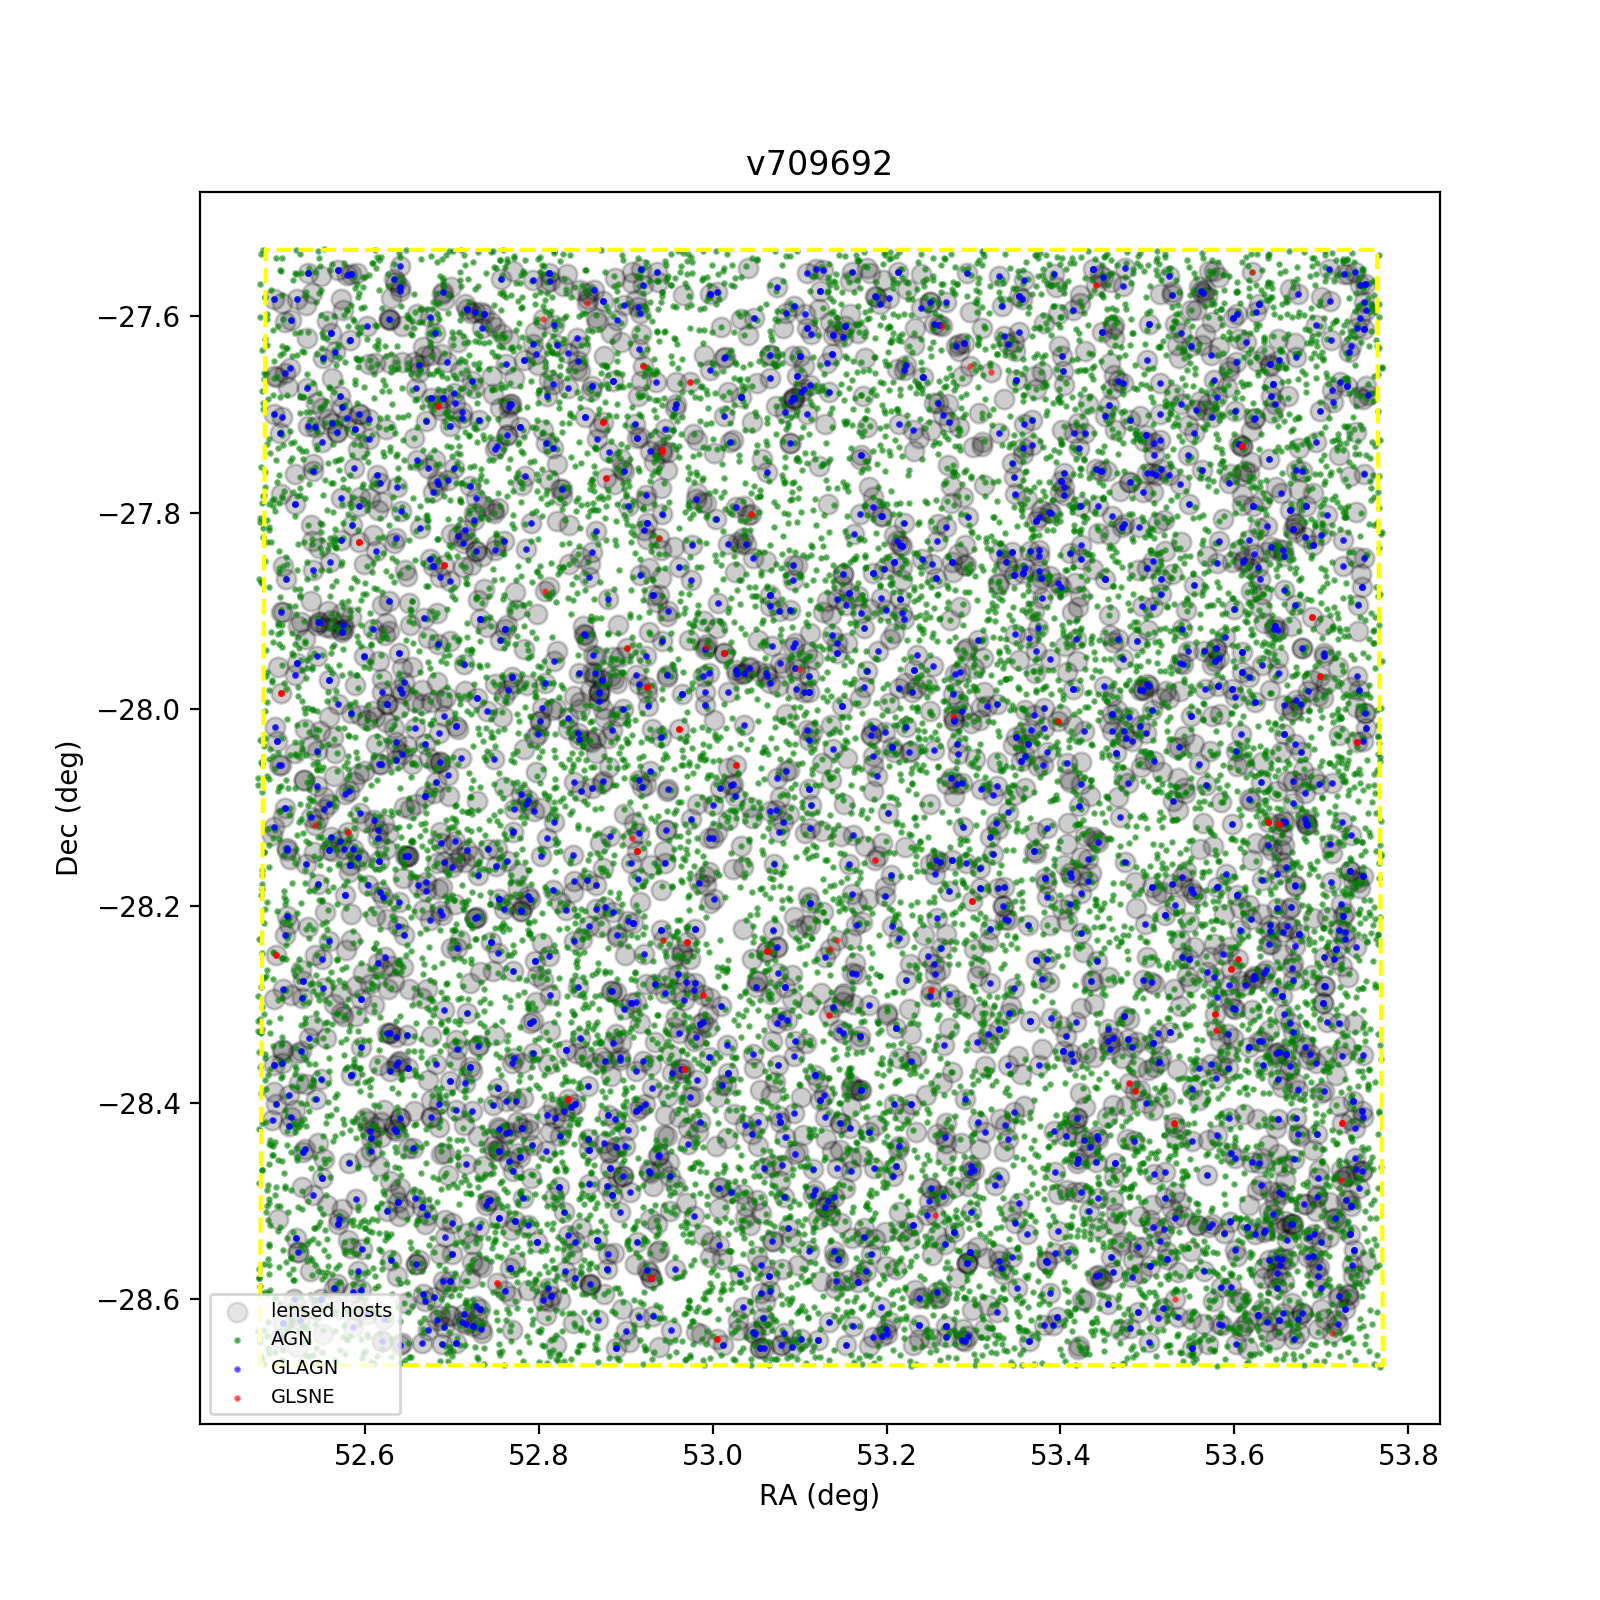

In [5]:
plot_instcat(709692, ddf)

In [7]:
visit = 709692
instcat = os.path.join('instcats', f'{visit:08d}', f'phosim_cat_{visit}.txt')
sensors = ddf.trim_sensors(instcat)
print(len(sensors))
print('"' + '^'.join(sensors) + '"')




36
"R:2,0 S:2,2^R:2,1 S:0,1^R:2,1 S:0,2^R:2,1 S:1,0^R:2,1 S:1,1^R:2,1 S:1,2^R:2,1 S:2,0^R:2,1 S:2,1^R:2,1 S:2,2^R:2,2 S:0,0^R:2,2 S:1,0^R:2,2 S:1,1^R:2,2 S:2,0^R:2,2 S:2,1^R:3,0 S:0,2^R:3,0 S:1,2^R:3,1 S:0,0^R:3,1 S:0,1^R:3,1 S:0,2^R:3,1 S:1,0^R:3,1 S:1,1^R:3,1 S:1,2^R:3,1 S:2,0^R:3,1 S:2,1^R:3,1 S:2,2^R:3,2 S:0,0^R:3,2 S:0,1^R:3,2 S:0,2^R:3,2 S:1,0^R:3,2 S:1,1^R:3,2 S:1,2^R:3,2 S:2,0^R:3,2 S:2,1^R:4,1 S:0,1^R:4,1 S:0,2^R:4,2 S:0,0"


In [6]:
df0 = pd.read_pickle(f'lensed_matches_v{visit}.pkl')
df = df0.query('sep2 < 0.003**2')
len(df0), len(df)

(3432, 1418)

<IPython.core.display.Javascript object>


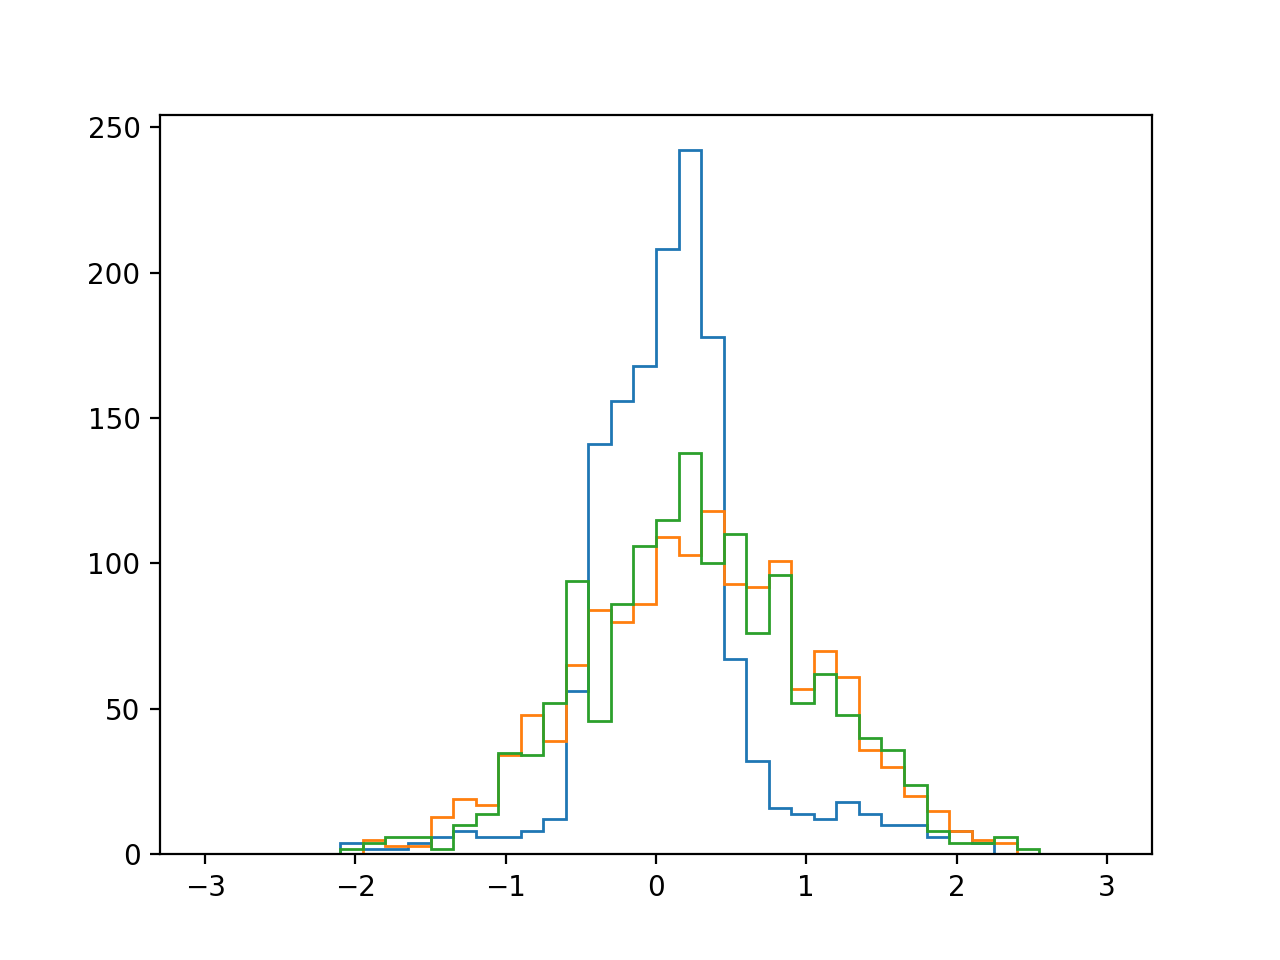

<IPython.core.display.Javascript object>


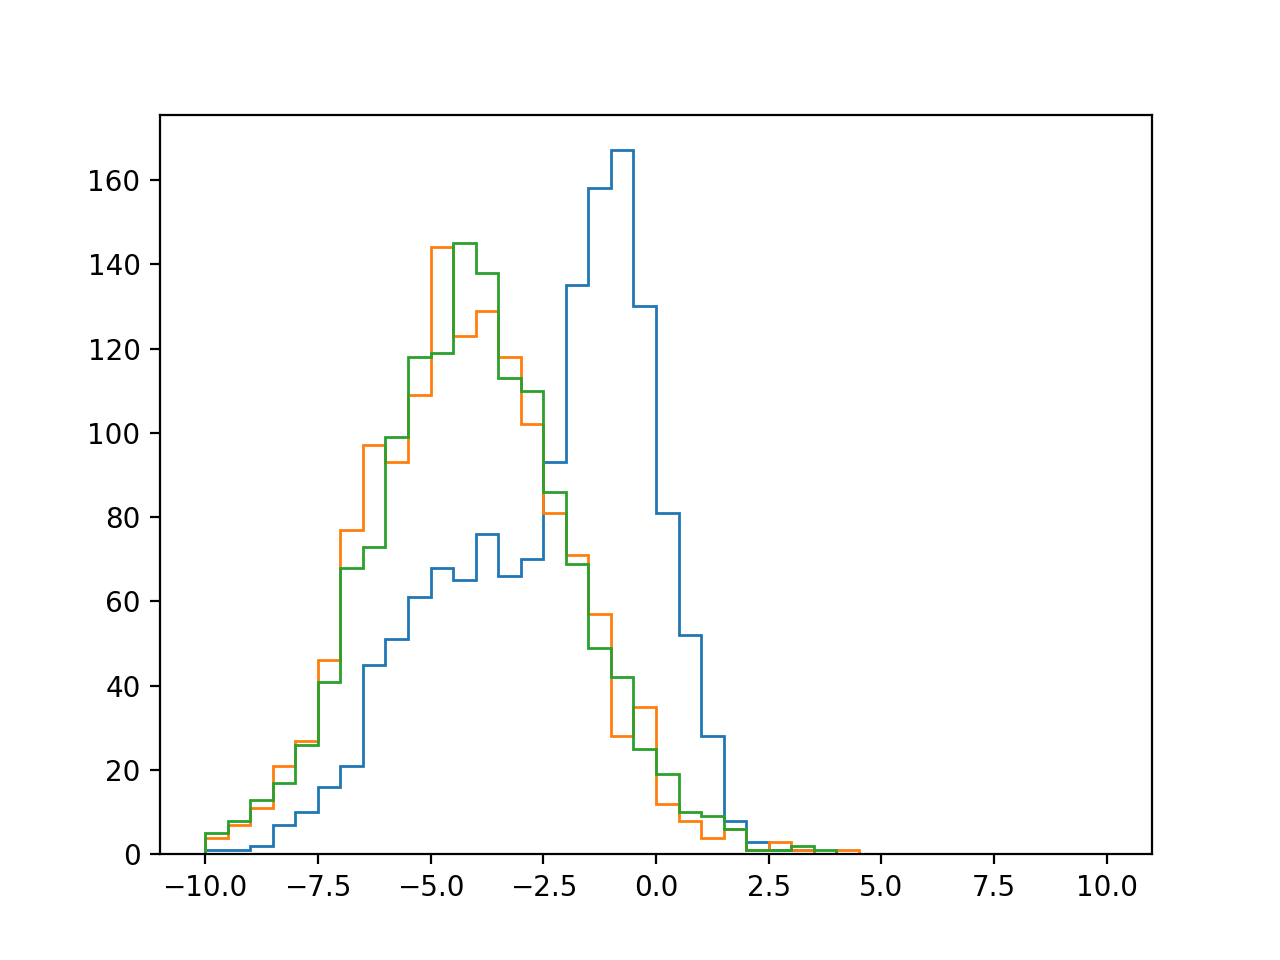

In [7]:
plt.figure()
x_range = (-3, 3)
plt.hist(df['z_glagn'] - df['z_agn'], bins=40, range=x_range, histtype='step')
plt.hist(df['z_glagn'] - df['z_rand'], bins=40, range=x_range, histtype='step')
plt.hist(df['z_glagn'] - df['z_nnn'], bins=40, range=x_range, histtype='step')

plt.figure()
x_range = (-10, 10)
plt.hist(df['mag_glagn'] - df['mag_agn'], bins=40, range=x_range, histtype='step')
plt.hist(df['mag_glagn'] - df['mag_rand'], bins=40, range=x_range, histtype='step')
plt.hist(df['mag_glagn'] - df['mag_nnn'], bins=40, range=x_range, histtype='step');

In [8]:
df.head()

,sep2,z_glagn,z_agn,mag_glagn,mag_agn,z_nnn,mag_nnn,z_rand,mag_rand
21,8.952366e-06,0.38,0.737670,22.766557,28.332283,1.333466,24.025805,2.317792,26.000639
54,1.229242e-13,0.99,0.790812,23.847018,23.069191,1.571216,26.292255,1.810931,23.708572
55,7.102779e-12,0.99,0.790812,22.576196,23.069191,1.571216,26.292255,1.571216,27.316041
62,5.513495e-06,1.02,2.839734,23.233168,28.153404,1.903182,26.872065,1.770662,23.800863
63,5.529411e-06,1.02,2.839734,22.521138,28.153404,1.903182,26.872065,1.903182,22.888139


<IPython.core.display.Javascript object>


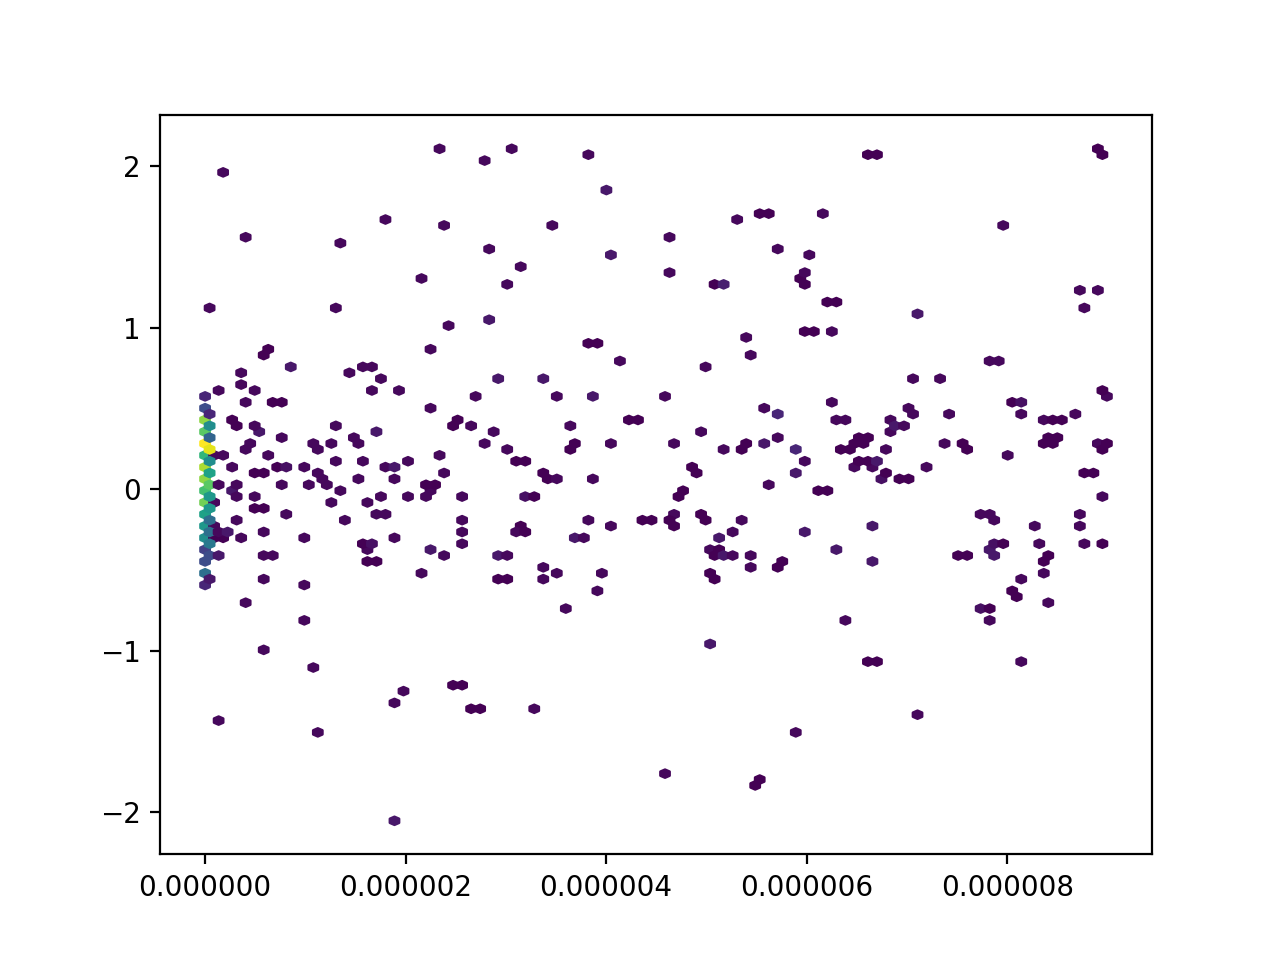

<IPython.core.display.Javascript object>


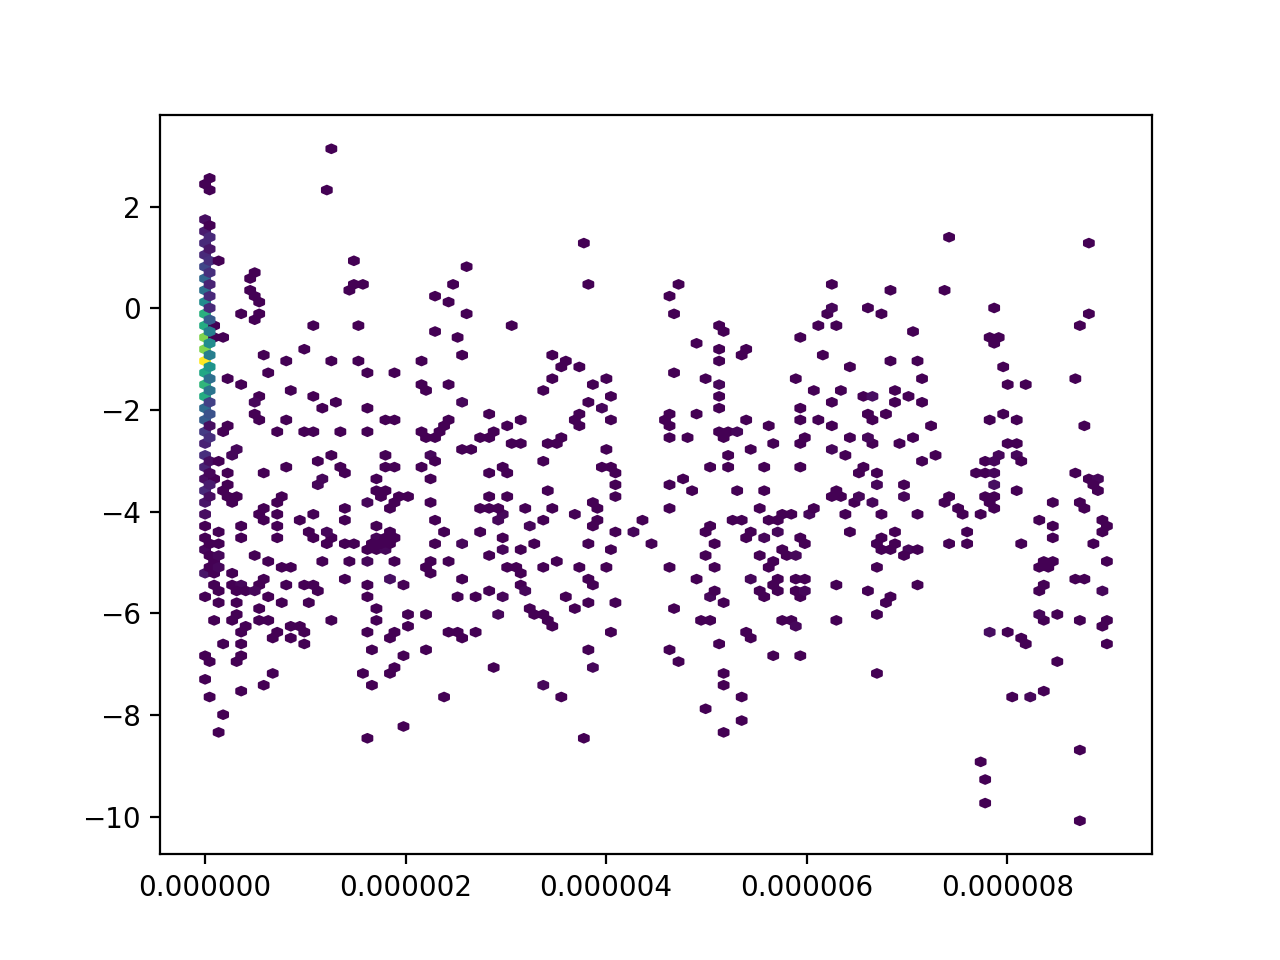

In [12]:
plt.figure()
plt.hexbin(df['sep2'], df['z_glagn'] - df['z_agn'], mincnt=1)
#plt.xlim(0, 0.01**2*2)
plt.figure()
plt.hexbin(df['sep2'], df['mag_glagn'] - df['mag_agn'], mincnt=1)
#plt.xlim(0, 0.01**2*2)